# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from PIL import Image
from glob import glob
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sns.set_style("whitegrid")

In [2]:
os.listdir("Training/") # Listado de frutas

['Plum 2',
 'Cherry Wax Red',
 'Lychee',
 'Plum 3',
 'Beetroot',
 'Apple Crimson Snow',
 'Tomato 3',
 'Grape Pink',
 'Pepino',
 'Pear Red',
 'Onion Red Peeled',
 'Lemon Meyer',
 'Ginger Root',
 'Salak',
 'Pineapple Mini',
 'Apple Golden 3',
 'Apple Red Delicious',
 'Tamarillo',
 'Tomato Heart',
 'Pear',
 'Raspberry',
 'Cantaloupe 1',
 'Mulberry',
 'Cherry 2',
 'Pear Forelle',
 'Tomato 1',
 'Clementine',
 'Apple Red 2',
 'Pepper Orange',
 'Tomato 4',
 'Grape White 4',
 'Corn',
 'Tangelo',
 'Nut Forest',
 'Cherry Wax Black',
 'Rambutan',
 'Peach Flat',
 'Mandarine',
 'Blueberry',
 'Cherry Wax Yellow',
 'Eggplant',
 'Peach 2',
 'Pear Stone',
 'Redcurrant',
 'Hazelnut',
 'Pear Williams',
 'Lemon',
 'Apple Red 3',
 'Quince',
 'Grape White 3',
 'Grape White 2',
 'Grape White',
 'Potato Red Washed',
 'Pear Abate',
 'Walnut',
 'Granadilla',
 'Fig',
 'Mango',
 'Strawberry Wedge',
 'Physalis with Husk',
 'Grape Blue',
 'Potato Red',
 'Physalis',
 'Limes',
 'Cauliflower',
 'Apple Braeburn',
 'Gra

In [3]:
fruits = ["Banana Lady Finger",
          "Mandarine","Raspberry","Strawberry Wedge","Strawberry"]

Training/Raspberry


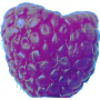

Training/Mandarine


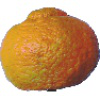

Training/Strawberry Wedge


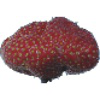

Training/Strawberry


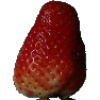

Training/Banana Lady Finger


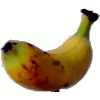

In [4]:
for fruit,_,images in os.walk("Training/"):
    if fruit.split("/")[-1]  in fruits:
        for img in images:
            print(fruit)
            display(Image.open(f"{fruit}/{img}")) #Abrimos las imagenes
            break

In [5]:
for fruit in fruits:
    print(fruit,len(glob(f"Training/{fruit}/*")))

Banana Lady Finger 450
Mandarine 490
Raspberry 490
Strawberry Wedge 738
Strawberry 492


# Load Data

In [6]:
"""Traemos nuestros datos de forma continua, hay una confiracion rgv, 
son imagenes de 100 x 100, vamos a tener 30000 datos por rojo azul y 
verde"""
raw_data = []
y = []
for fruit in fruits:
    files = glob(f"Training/{fruit}/*")
    fruit_data = [list(plt.imread(file).flatten().astype(int)) for file in files[:50]] #Acotamos el problema a 50 imagenes por problema
    label_data = [fruit for file in files[:50]]
    raw_data.extend(fruit_data)
    y.extend(label_data)

In [7]:
n = len(fruit_data[0])

In [8]:
n

30000

In [9]:
X = pd.DataFrame(raw_data)
y = pd.Series(y)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [11]:
X.shape

(250, 30000)

# Transform Data

## Analyze data

<AxesSubplot:xlabel='2500', ylabel='5000'>

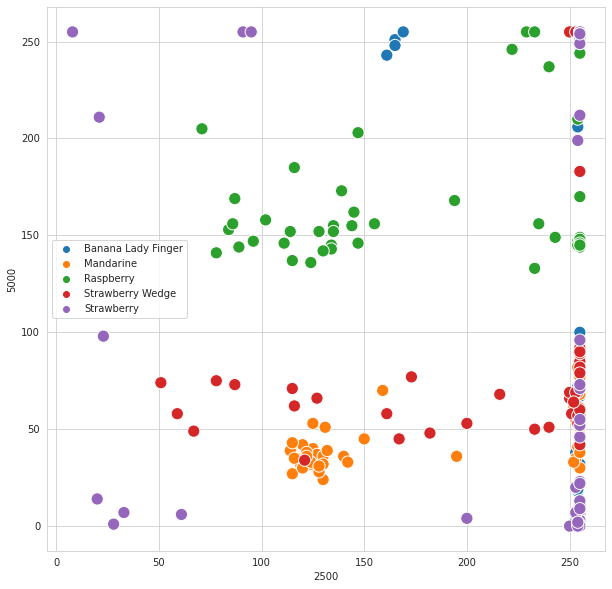

In [13]:
plt.subplots(figsize = (10,10))
sns.scatterplot(x = 1*50*50 ,y =  2*50*50,data = X,hue = y,s=150)

In [14]:
y.value_counts()

Mandarine             50
Banana Lady Finger    50
Raspberry             50
Strawberry Wedge      50
Strawberry            50
dtype: int64

# Create PCA

In [17]:
def get_pca (n_components):
    pipeline = Pipeline(steps= [("scaler",StandardScaler()), ("pca",PCA(n_components=n_components))])
    return pipeline
def inverse_transform_fruit(X_0,pca):
    inverse_data = pca.inverse_transform(X_0)
    return inverse_data.reshape(100,100,3).astype(int).clip(0,255) #Tres porque son tres colores

In [18]:
n_components_list = [50,10,2]
dict_pca = {}
for n_components in n_components_list:
    pca = get_pca(n_components = n_components)
    pca.fit(X)
    dict_pca[n_components] = pca

## Decomposition

Mandarine


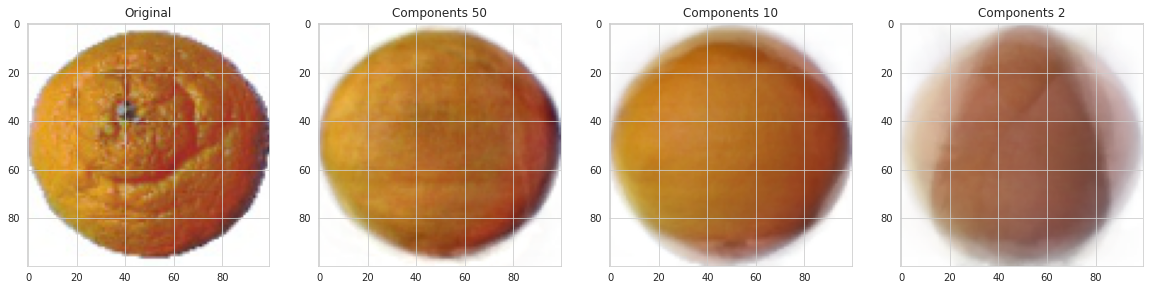

In [26]:
j = np.random.randint(X.shape[0])
fig,axs= plt.subplots(1,len(n_components_list)+1,figsize = (20,15))
axs[0].imshow(X.values[j].reshape(100,100,3).astype(int))
axs[0].set_title(f"Original")
print(y[j])
for ax,n_components in zip(axs[1:],n_components_list):
    pca = dict_pca[n_components]
    ax.imshow(inverse_transform_fruit(pca.transform(X)[[j]],pca))
    ax.set_title(f"Components {n_components}")
    
    

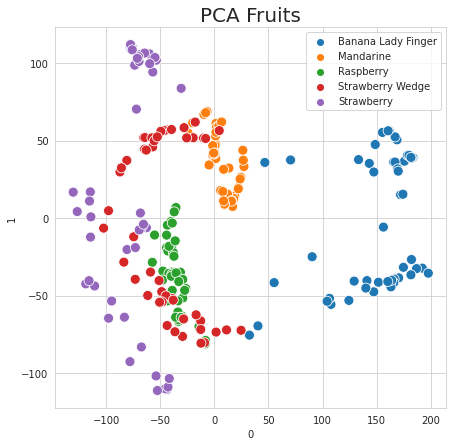

In [28]:
plt.subplots(figsize = (7,7))
sns.scatterplot(x = 0,y = 1,data = pd.DataFrame(dict_pca[2].transform(X)),hue=y.values,s = 100)

plt.title("PCA Fruits",fontdict={"size":20});